# AHJIN STUDIOS: Box Office Success Blueprint

## Project Overview

Ahjin Studios is entering the original film industry at a pivotal moment. With major studios and streaming platforms in a high-stakes race to capture audience attention, the battle for box office dominance has never been more fierce - or more data-driven. While storytelling remains the heart of cinema, strategic decision-making has become its backbone.

This project is designed to fuse creativity with commercial intelligence. By analyzing industry-wide trends across genres, release timing, budgets, and audience reception, we aim to decode the anatomy of a box office hit, not just artistically, but financially. The outcome will be a tactical playbook to guide Ahjin Studios as it takes its first bold steps into feature film production.

## Business Problem

The entertainment industry is undergoing a seismic shift. Legacy franchises, tentpole films, and algorithm-fed content have saturated screens, making it harder for newcomers to break through the noise. Audiences are fragmented. Competition is global. And content fatigue is real.

For Ahjin Studios, a rising player with ambition but no prior production history, entering this landscape blind would be risky. Production budgets often stretch into the tens or hundreds of millions, and missteps in genre, budget, cast, or release timing can spell financial disaster. In contrast, the right decisions can lead to outsized returns, cultural impact, and long-term brand equity.

In short, we can't afford to guess. Ahjin Studios must understand:

- What types of films are truly resonating with audiences?
- Which market trends are noise, and which signal long-term opportunity?
- Where can we maximize ROI without chasing blockbusters?
- And most importantly, how can a new studio compete without big-name IPs or A-list stars?

## Project Objective

To analyze recent movie performance data - spanning box office returns, production costs, genres, ratings, and more - and translate those insights into clear, actionable strategies for Ahjin Studios.

This analysis will serve as a foundation for greenlighting original projects that are not just creative, but commercially viable. It aims to bridge the gap between creative vision and data-driven execution.

## Key Business Questions

- Which genres and themes consistently yield strong financial returns?
- What budget ranges offer the best cost-to-revenue efficiency?
- How does release timing (month, season) affect box office performance?
- To what extent do ratings, runtime, or cast reputation influence success?
- Are independent films or franchise titles dominating the charts?
- What roles do audience sentiment, vote counts, and platform popularity play?
- Can lower-budget films compete globally, or is scale a requirement?

## Deliverables

- Cleaned and enriched datasets from multiple industry sources (IMDb, TMDb, Rotten Tomatoes, etc.)
- Univariate, bivariate, and multivariate analysis exploring box office trends
- Data visualizations illustrating high-performing genres, ROI benchmarks, release timing, and more
- A strategic summary deck with insights and investment-ready recommendations for greenlighting films

## Final Goal

To equip Ahjin Studios’ executive team with a data-driven framework for decision-making in original content production, ensuring each project is launched with clarity, commercial insight, and confidence.

Lights, camera… strategy.

## INITIAL DATA EXPLORATION (IDE)

Every dataset tells a story- but before we dive into any narratives, we'll flip through the table of contents. This phase is about getting comfortable with the data: seeing what’s there, what’s missing, and what might surprise us later if we don’t pay attention now.

#### What's happening:
- Importing key libraries like 'pandas', 'numpy', 'seaborn' and 'matplotlib'- the usual suspects for slicing, dicing and visualizing data and 'sql' for database manipulation.
- Previewing the first few rows to get a feel for the dataset’s structure, naming conventions, and early red flags (no one likes nasty surprises 30 cells in).
- Checking the shape of the data because whether it's 500 rows or 50,000 completely changes the game.
- Get metadata
- Get basic statistics information of both numerica and categorical columns

This is where trust is built- between us and the dataset.

Exploration done right is part instinct, part structure- this is BOTH!

In [1]:
# Core Libraries for Data Manipulation and Numerical Computation
import pandas as pd
import numpy as np

# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Time Series Utlities
import calendar

# Database Interraction
import sqlite3

# Expression Evaluation
import ast

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

### 1. BUDGET DATASET

In [2]:
# Load the dataset
budget_df = pd.read_csv(r'..\Raw_Data\tn.movie_budgets.csv', encoding = 'Latin1')
budget_df.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Display the shape
print(f"The dataset has {budget_df.shape[0]} rows and {budget_df.shape[1]} columns.")

The dataset has 5782 rows and 6 columns.


In [4]:
# Display column names
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [5]:
# Get metadata
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
# Display descriptive statistics for categorical columns
budget_df.describe(include = 'O').T

,count,unique,top,freq
release_date,5782,2418,"Dec 31, 2014",24
movie,5782,5698,Halloween,3
production_budget,5782,509,"$20,000,000",231
domestic_gross,5782,5164,$0,548
worldwide_gross,5782,5356,$0,367


In [7]:
# Check for duplicates and null values
print("Duplicates:", budget_df.duplicated().sum())
print("\nNull Values:\n", budget_df.isna().sum())

Duplicates: 0

Null Values:
 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### 2. GROSS DATASET

In [8]:
# Load gross dataset
gross_df = pd.read_csv(r'..\Raw_Data\bom.movie_gross.csv')
gross_df.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
# Display the shape 
print(f"The dataset has {gross_df.shape[0]} rows and {gross_df.shape[1]} columns.")

The dataset has 3387 rows and 5 columns.


In [10]:
# Displya column names
gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [11]:
# Get metadata 
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
# Get basic statistics for numerical columns
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [13]:
# Get basic statistics for categorical columns
gross_df.describe(include = 'O').T

,count,unique,top,freq
title,3387,3386,Bluebeard,2
studio,3382,257,IFC,166
foreign_gross,2037,1204,1200000,23


In [14]:
# Check for duplicates and null values
print("Duplicates:", gross_df.duplicated().sum())
print("\nNull Values:\n", gross_df.isna().sum())

Duplicates: 0

Null Values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


### 3. TMDB MOVIES DATASET

In [15]:
# Load TMDB movies dataset
tmdb_df = pd.read_csv(r'..\Raw_Data\tmdb.movies.csv', index_col = 0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
# Display the shape
print(f'The dataset has {tmdb_df.shape[0]} rows and {tmdb_df.shape[1]} columns.')

The dataset has 26517 rows and 9 columns.


In [17]:
# Display column names
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [18]:
# Get metadata
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [19]:
# Display descriptive statistics for numerical columns
tmdb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26517.0,295050.153260,153661.615648,27.0,157851.0,309581.000,419542.000,608444.000
popularity,26517.0,3.130912,4.355229,0.6,0.6,1.374,3.694,80.773
vote_average,26517.0,5.991281,1.852946,0.0,5.0,6.000,7.000,10.000
vote_count,26517.0,194.224837,960.961095,1.0,2.0,5.000,28.000,22186.000


In [20]:
# Display descriptive statistics for categorical columns
tmdb_df.describe(include = 'O').T

,count,unique,top,freq
genre_ids,26517,2477,[99],3700
original_language,26517,76,en,23291
original_title,26517,24835,Eden,7
release_date,26517,3433,2010-01-01,269
title,26517,24688,Eden,7


In [21]:
# Check for duplicates and null values
print('Duplicates:', tmdb_df.duplicated().sum())
print('\nNull Values:\n', tmdb_df.isna().sum())

Duplicates: 1020

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


### 4. ROTTEN TOMATOES MOVIES INFORMATION DATASET

In [22]:
# Load dataset
rt_movies_df = pd.read_csv(r"..\Raw_Data\rt.movie_info.tsv", sep = '\t')
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [23]:
# Get dataset shape
print(f"The dataset has {rt_movies_df.shape[0]} rows and {rt_movies_df.shape[1]} columns")

The dataset has 1560 rows and 12 columns


In [24]:
# Display column names
rt_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [25]:
# Get metadata
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [26]:
# Get basic statistical information for categorical columns
rt_movies_df.describe(include = 'O').T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"600,000",2
runtime,1530,142,90 minutes,72


In [27]:
print("Duplicates:", rt_movies_df.duplicated().sum())
print("\nNull Values:\n", rt_movies_df.isna().sum())

Duplicates: 0

Null Values:
 id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


### 5. IMDb DATABASE EXPLORATION

In [28]:
# Create database connection
conn = sqlite3.connect(r'..\Raw_Data\im.db') 
cur = conn.cursor()

# View all tables in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
cur.fetchall() 

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

### Focus Areas

We’re working with a local IMDB database structured across multiple relational tables:

- movie_basics 
- directors 
- known_for  
- movie_akas  
- movie_ratings  
- persons
- principals  
- writers

Our primarily focus is on the **movie_basics** and **movie_ratings** tables, as they form the foundation for exploring patterns in movie data and audience response.

At this stage, we’ll begin by:
- Inspecting the structure and columns of each table
- Understanding how the tables relate (e.g. shared keys)
- Identifying relevant variables for our analysis

Our goal is to uncover trends, correlations, and insights from movie metadata (like genre, title, year). Let’s start by peeking inside the structure of these two key tables.

### Movie Basics Table Exploration

In [29]:
# Connect to movie_basics table and print out first few rows
moviebasics_df = pd.read_sql(
    """
        SELECT * 
        FROM movie_basics
    """, conn)

moviebasics_df.head() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
# Get table shape
print(f"The table contains {moviebasics_df.shape[0]} rows and {moviebasics_df.shape[1]} columns")

The table contains 146144 rows and 6 columns


In [31]:
# Get column names
moviebasics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [32]:
# Get metadata
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [33]:
# Get basic statistical information for all categorical variables
moviebasics_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,146144,146144,tt0063540,1
primary_title,146144,136071,Home,24
original_title,146123,137773,Broken,19
genres,140736,1085,Documentary,32185


In [34]:
# Get basic statistical information for all numeric variables
moviebasics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,146144.0,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,114405.0,86.187247,166.360590,1.0,70.0,87.0,99.0,51420.0


In [35]:
# Display number of duplicates and null values
print("Duplicates:", moviebasics_df.duplicated().sum())
print("\nNull Values:\n", moviebasics_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


### Movie Ratings Table

In [36]:
# Load movie_ratings table 
movieratings_df = pd.read_sql(
    """
        SELECT * 
        FROM movie_ratings
    """, conn)

movieratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [37]:
# Get table shape
print(f"The table contains {movieratings_df.shape[0]} rows and {movieratings_df.shape[1]} columns")

The table contains 73856 rows and 3 columns


In [38]:
# F+Get column names
movieratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [39]:
# Get metadata
movieratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [40]:
# Get basic statistical information of numeric variables
movieratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [41]:
# Find out number of duplicates and null values present
print("Duplicates:", movieratings_df.duplicated().sum())
print("\nNull Values:\n", movieratings_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [42]:
# Merge the two datasets on the common column movie_id
q = """
    SELECT 
        mb.movie_id,
        mb.primary_title,
        mb.original_title,
        mb.start_year,
        mb.runtime_minutes,
        mb.genres,
        mr.averagerating,
        mr.numvotes
    FROM movie_basics mb
    INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

movies_df = pd.read_sql(q, conn)
movies_df.head() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [43]:
# Get new dataset shape
print(f"The dataset contains {movies_df.shape[0]} rows and {movies_df.shape[1]} columns")

The dataset contains 73856 rows and 8 columns


In [44]:
# Check column names
movies_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [45]:
# Get metadata
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [46]:
# Get basic statistical information for numeric columns
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,73856.0,2014.276132,2.614807,2010.0,2012.0,2014.0,2016.0,2019.0
runtime_minutes,66236.0,94.654040,208.574111,3.0,81.0,91.0,104.0,51420.0
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [47]:
# Get basic statistical information for categorical columns
movies_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,73856,73856,tt0063540,1
primary_title,73856,69993,The Return,11
original_title,73856,71097,Broken,9
genres,73052,923,Drama,11612


In [48]:
# Get duplicate and null values counts
print("Duplicates:", movies_df.duplicated().sum())
print("\nNull Values:\n", movies_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


## OBSERVATIONS AND EARLY INSIGHTS

We conducted an Initial Data Exploration (IDE) across the five key datasets powering our movie analytics project. The goal was to understand data structure, completeness, and quality before diving into cleaning or storytelling. Below is a summary of our early findings:

### 1. **Movie Budgets Dataset**
- **Shape**: 5,782 rows × 6 columns  
- **Key Columns**: release_date, movie, production_budget, domestic_gross, worldwide_gross
- **Highlights**:
  - No missing values — dataset is fully complete.
  - All monetary fields are stored as strings (e.g., "$100,000,000") and require conversion to numeric types.
  - Over 500 movies show $0 in domestic_gross, and 367 in worldwide_gross. These likely indicate unreported or unavailable data.
  - No duplicate entries found.

### 2. **Gross Revenue Dataset**
- **Shape**: 3,387 rows × 5 columns  
- **Key Columns**: title, studio, domestic_gross, foreign_gross, year
- **Highlights**:
  - foreign_gross has 1,350 missing values — over one-third of the dataset.
  - Minor missingness in studio (5 rows) and domestic_gross (28 rows).
  - Monetary columns are stored as strings — will need cleaning for analysis.
  - No duplicate rows detected.

### 3. **TMDB Movies Dataset**
- **Shape**: 26,517 rows × 9 columns  
- **Key Columns**: genre_ids, original_title, popularity, vote_average, vote_count
- **Highlights**:
  - No missing values — data is complete.
  - 1,020 duplicate entries found; will need deduplication.
  - genre_ids are stored as stringified lists — need to be parsed for genre-level insights.
  - Rich data on audience sentiment, popularity trends, and voting behavior.

### 4. **IMDb Database (Merged: movie_basics + movie_ratings)**
- **Shape**: 73,856 rows × 8 columns  
- **Key Columns**: primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
- **Highlights**:
  - runtime_minutes has 7,620 missing entries (~10% of data).
  - genres missing in 804 rows.
  - One extreme outlier in runtime_minutes (~51,420 mins) — needs capping or removal.
  - No duplicate records.
  - Ratings data is robust — average rating is ~6.3, normally distributed around 6.5.
  - Voting counts vary drastically, with some titles exceeding 1.8M votes.
  - Documentary is the most common genre.

These insights help prioritize cleaning tasks and shape our storytelling strategy. We'll focus on handling missingness (especially runtimes and revenues), converting key fields to numeric types, and isolating outliers before diving into visual storytelling.

## DATA WRANGLING

To prepare the datasets for analysis, we perform a series of data cleaning and transformation steps across all sources:

### Universal Cleaning Tasks
- **Convert currency strings to numeric** in all budget and gross-related columns (e.g production_budget, domestic_gross, foreign_gross, etc.).
- **Handle missing values**, particularly in:
  - foreign_gross (Gross Revenue dataset)
  - box_office and review fields (Rotten Tomatoes dataset)
  - runtime_minutes and genres (IMDB)
- **Drop duplicate entries**:
  - TMDB Movies: 1,020 duplicates

### Dataset-Specific Wrangling

#### Dates & Titles
- **Standardize movie titles and release dates** across all datasets to improve matchability.
- Parse and convert date fields (e.g release_date, year, start_year) into consistent datetime formats.

#### IMDB Tables
- **Convert outliers and handle anomalies**:
  - Address unrealistic values in runtime_minutes (e.g 51,420 minutes)
- **Parse and standardize genre strings** from pipe-delimited format to lists or categories for analysis.
- Ensure movie_id is consistently typed (object/string) across movie_basics and movie_ratings before merging.

### HANDLING NULL VALUES
#### 1. GROSS DATASET

In [49]:
null_counts = gross_df.isna().sum()
null_percentages = (null_counts / len(gross_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                Null Count  Null Percentage (%)
title                    0                 0.00
studio                   5                 0.15
domestic_gross          28                 0.83
foreign_gross         1350                39.86
year                     0                 0.00


#### 'studio' Column

In [50]:
# Get rows with nulls
gross_df.loc[gross_df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [51]:
# Impute nulls in studio column
gross_df.loc[gross_df['title'] == 'Plot for Peace', 'studio'] = 'Trinity Films'
gross_df.loc[gross_df['title'] == 'Fireflies in the Garden', 'studio'] = 'Senator Entertainmet Inc.'
gross_df.loc[gross_df['title'] == 'Keith Lemon: The Film', 'studio'] = 'Lionsgate'
gross_df.loc[gross_df['title'] == 'Secret Superstar', 'studio'] = 'Zee Studios'
gross_df.loc[gross_df['title'] == 'Outside the Law (Hors-la-loi)', 'studio'] = 'StudioCanal'

# Preview changes
print("Null values after imputation:", gross_df['studio'].isna().sum())

Null values after imputation: 0


#### 'domestic_gross' Column

In [52]:
# Get rows with nulls
gross_df.loc[gross_df['domestic_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


In [53]:
median_gross = gross_df['domestic_gross'].median()
gross_df['domestic_gross'] = gross_df['domestic_gross'].fillna(median_gross)

print("Null Values after imputation:", gross_df['domestic_gross'].isna().sum())

Null Values after imputation: 0


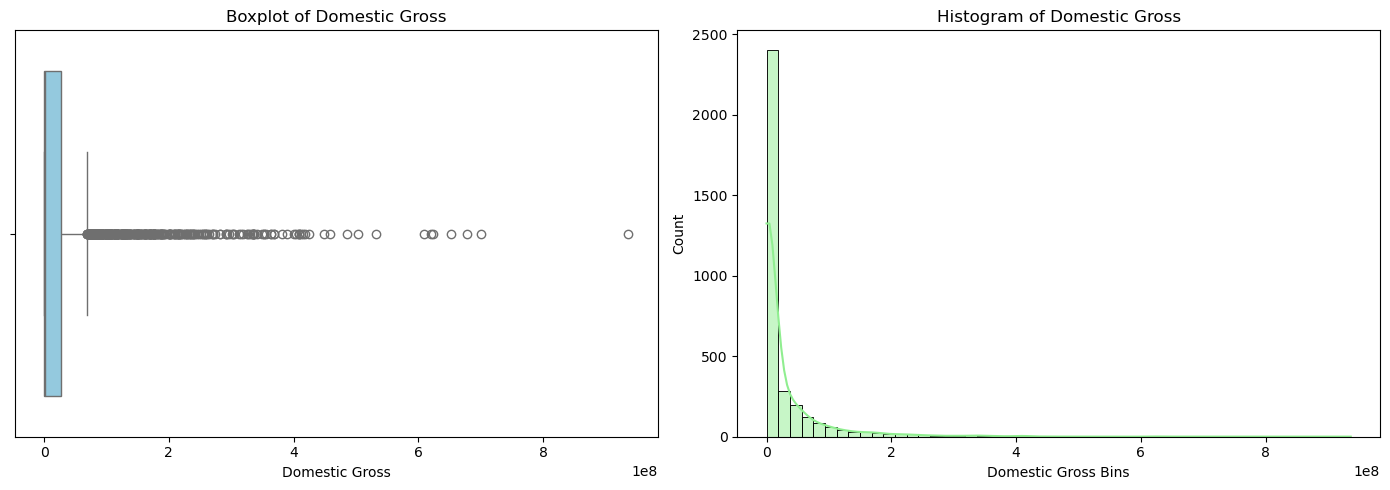

In [54]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='domestic_gross', ax = axes[0], color = 'skyblue')
axes[0].set_title("Boxplot of Domestic Gross")
axes[0].set_xlabel("Domestic Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'domestic_gross', bins=50, kde=True, ax = axes[1], color = 'lightgreen')
axes[1].set_title("Histogram of Domestic Gross")
axes[1].set_xlabel("Domestic Gross Bins")
plt.tight_layout()
plt.show()

#### 'foreign_gross' Column

In [55]:
# Preview rows with nulls in foreign_gross
gross_df.loc[gross_df['foreign_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [56]:
# Inspect unique values in foreign_gross
gross_df.loc[~gross_df['foreign_gross'].astype(str).str.replace(',', '').str.isnumeric(), 'foreign_gross'].unique()

array([nan, '1,131.6', '1,019.4', '1,163.0', '1,010.0', '1,369.5'],
      dtype=object)

In [57]:
# Imputation strategy:

# Coerce to numeric
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'], errors='coerce')

# Impute median
median_foreign_gross = gross_df['foreign_gross'].median()
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(median_foreign_gross)

# Preview changes
print("Null Values after imputation:", gross_df['foreign_gross'].isna().sum())

Null Values after imputation: 0


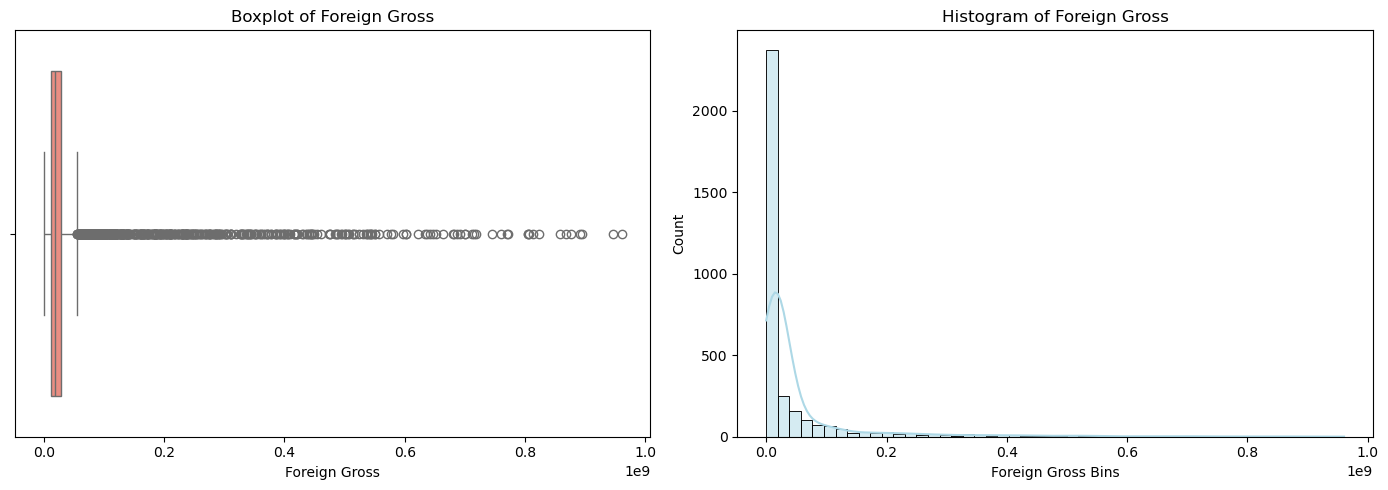

In [58]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='foreign_gross', ax = axes[0], color = 'salmon')
axes[0].set_title("Boxplot of Foreign Gross")
axes[0].set_xlabel("Foreign Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'foreign_gross', bins = 50, kde = True, ax = axes[1], color = 'lightblue')
axes[1].set_title("Histogram of Foreign Gross")
axes[1].set_xlabel("Foreign Gross Bins")
plt.tight_layout()
plt.show()

### OTLIER HANDLING IN GROSS DATASET

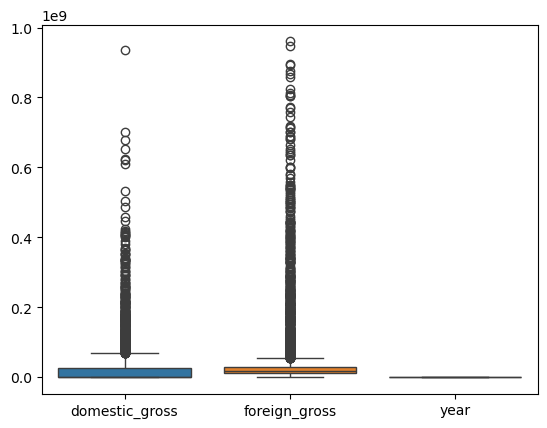

In [59]:
sns.boxplot(gross_df);

#### Comment on Outliers

> The boxplots for both **domestic** and **foreign gross** clearly reveal the presence of extreme outliers - films that have earned substantially more than the majority. In the movie industry, these are typically blockbuster titles, franchise installments, or globally viral releases with massive marketing budgets and wide theatrical distribution. These high-grossing films, while statistically extreme, represent genuine and meaningful data points.
>
> **Removing these outliers would strip away the very success stories we aim to emulate**. Therefore, we will **retain the outliers** in our analysis to ensure we capture the full spectrum of market performance and derive actionable insights from the most profitable examples.

### ROTTEN TOMATOES MOVIE INFORMATION DATASET

In [60]:
null_counts = rt_movies_df.isna().sum()
null_percentages = (null_counts / len(rt_movies_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

              Null Count  Null Percentage (%)
id                     0                 0.00
synopsis              62                 3.97
rating                 3                 0.19
genre                  8                 0.51
director             199                12.76
writer               449                28.78
theater_date         359                23.01
dvd_date             359                23.01
currency            1220                78.21
box_office          1220                78.21
runtime               30                 1.92
studio              1066                68.33


In [61]:
rt_movies_df.loc[rt_movies_df['genre'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,289,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95 minutes,NaN
250,327,"When a new robot, Raymond, defeats the three h...",NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 minutes,NaN
658,843,Miners want to drill for billions of dollars w...,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 minutes,NaN
1082,1393,Steven Seagal plays an expert sniper on a spec...,R,NaN,Fred Olen Ray,Fred Olen Ray,NaN,NaN,NaN,NaN,84 minutes,NaN
1342,1736,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
rt_movies_df.loc[rt_movies_df['rating'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
rt_movies_df.loc[rt_movies_df['director'].isna()].head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
12,19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
20,27,NaN,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Drop useless columns
rt_movies_df = rt_movies_df.drop(columns = [
    "studio",
    "currency",
    "synopsis",
])

rt_movies_df = rt_movies_df.rename(columns = {"rating": "maturity_rating"})

# Drop useless rows
rt_movies_df = rt_movies_df.dropna(subset = ["maturity_rating", "genre"])

# Fill remaining categorical columns with 'unknows'
cat_cols = rt_movies_df.select_dtypes(include = ['object']).columns

for col in cat_cols:
   rt_movies_df[col].fillna('Unknown', inplace = True)

# Preview changes
rt_movies_df.isna().sum()

id                 0
maturity_rating    0
genre              0
director           0
writer             0
theater_date       0
dvd_date           0
box_office         0
runtime            0
dtype: int64

### MERGED IMDB DATASET

In [65]:
# Get null values percentage to guide on imputation
null_counts = movies_df.isna().sum()
null_percentages = (null_counts / len(movies_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                 Null Count  Null Percentage (%)
movie_id                  0                 0.00
primary_title             0                 0.00
original_title            0                 0.00
start_year                0                 0.00
runtime_minutes        7620                10.32
genres                  804                 1.09
averagerating             0                 0.00
numvotes                  0                 0.00


In [66]:
# Impute missing values in runtime_minutes with median because it is more statistically sound
median_runtime = movies_df['runtime_minutes'].median()
movies_df['runtime_minutes'] = movies_df['runtime_minutes'].fillna(median_runtime)

# Drop null values in 'genres'
movies_df = movies_df.dropna(subset = ['genres'])

# Preview changes
print("Missing Values after imputation:\n", movies_df.isna().sum())

# Check new shape
print(f"\nThe dataset now contains {movies_df.shape[0]} rows and {movies_df.shape[1]} columns")

Missing Values after imputation:
 movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

The dataset now contains 73052 rows and 8 columns


#### OUTLIER HANDLING FOR MERGED IMDB DATASET

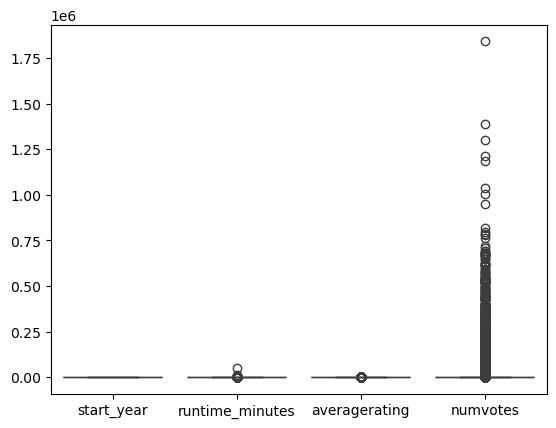

In [67]:
sns.boxplot(movies_df);

### Outlier Commentary

The boxplot reveals clear outliers across multiple numeric columns:

- **runtime_minutes**: Several films significantly exceed the typical range, likely due to special formats (e.g director’s cuts, miniseries logged as films) or data entry errors. These extreme values are sparse but can skew distribution-based analyses like mean runtime or standard deviation.

- **numvotes**: This variable exhibits extreme right-skewness, with a small subset of movies receiving disproportionately high votes - likely blockbusters or cult classics. These outliers are *genuine signals*, not noise, and provide valuable insight into popularity dynamics. However, log-transforming or binning may be helpful if modeling or clustering is later considered.

- **averagerating** and **start_year**: Outliers here are less severe. A few ratings may hit extreme values (e.g unusually low or high), but IMDb caps the rating scale, so distortion is limited. For start_year, occasional anomalies (e.g pre-1900 entries or far-future entries) may be metadata quirks or special historical/fictional content.

**Takeaway**: Most outliers are *contextual* - they often carry meaning rather than being simple anomalies. Thus, should not be dropped blindly. Instead, they offer rich angles for narrative exploration, especially when highlighting patterns in niche genres, cult films, or legacy cinema.

### HANDLING DUPLICATES 
#### 1. TMDB MOVIES

In [68]:
print("Duplicates before imputation:", tmdb_df.duplicated().sum())

tmdb_df = tmdb_df.drop_duplicates()
print("\nDuplicates after imputation:", tmdb_df.duplicated().sum())

Duplicates before imputation: 1020

Duplicates after imputation: 0


### HANDLING CATEGORICAL VARIABLES

#### BUDGET DATASET

In [69]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [70]:
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_clean:
    budget_df[col] = (
        budget_df[col]
        .str.replace(r'[\$,]', '', regex = True) 
        .astype(float)                          
    )

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [71]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


### GROSS DATASET

In [72]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


### TMDB GENRE CLEANUP

In [73]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [74]:
# Convert genre_ids from string to list
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# ap genre IDs to names
genre_id_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Map and join into a single string
tmdb_df['genres'] = tmdb_df['genre_ids'].apply(
    lambda ids: '|'.join([genre_id_map.get(i, 'Unknown') for i in ids])
)

# Sanity Check
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure|Fantasy|Family
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy|Adventure|Animation|Family
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Adventure|Action|Science Fiction
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Animation|Comedy|Family
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Action|Science Fiction|Adventure


In [75]:
print("Null Values:\n", tmdb_df.isna().sum())

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genres               0
dtype: int64


## EXPLORATORY DATA ANALYSIS (EDA)

This section dives into the patterns, structures, and nuances embedded within our movie datasets. Through statistical summaries and visualizations, we’ll break down how individual features behave, interact, and contribute to broader trends.

We begin with time series analysis to capture how movie-related phenomena have evolved over time. This will be followed by:

- **Univariate Analysis** - understanding individual variable distributions  
- **Bivariate Analysis** - exploring relationships between two variables  
- **Multivariate Analysis** - assessing how multiple features interact

The goal is clarity and direction: to identify what’s happening in the data, when it happens, and why it could matter for decision-making.

### Dataset Overview and Analytical Purpose

| Dataset               | Analytical Focus                                                            |
|-----------------------|------------------------------------------------------------------------------|
| Rotten Tomatoes   | Audience rating patterns, theater/DVD release dynamics, genre–box office links |
| IMDb              | Runtime vs ratings, genre impact on popularity, core movie performance       |
| TN Movie Budgets  | Budget allocations vs domestic and worldwide returns (profitability drivers) |
| BOM Gross         | Domestic vs international performance, year-on-year earnings trajectory      |
| TMDb              | Popularity scoring, vote distributions, release timing and engagement trends |

### Phase 0 - Time Series Analysis

Before diving into variable-specific patterns, we explore key metrics over time. This includes:

- **Release frequency trends** (yearly and seasonal)
- **Budget evolution** over the decades
- **Box office performance shifts**
- **Rise and fall of genres over time**
- **DVD vs theatrical release trends**

Understanding the temporal dynamics adds essential context to downstream analysis and helps isolate outliers driven by historical events (e.g economic recessions, pandemics, streaming surges).

### Phase 1 – Analyze Individually

Each dataset will be explored in isolation first. This allows for focused insight extraction without the noise of integration issues.

| Dataset            | Primary Use Cases                                                             |
|--------------------|--------------------------------------------------------------------------------|
| Rotten Tomatoes    | Track audience rating behavior, genre tendencies, and release format trends     |
| IMDb               | Assess runtime implications, viewer ratings, and popularity clusters            |
| TN Movie Budgets   | Study how budget size correlates with gross revenue and ROI                    |
| BOM Gross          | Compare foreign and domestic appeal, observe long-term gross trends            |
| TMDb               | Evaluate popularity and vote metrics alongside genre and release data          |

Each analysis phase will yield its own set of recommendations and hypotheses.

### Phase 2 – Merge for Cross-Dataset Insight

Once individual patterns are established, deeper insight can be unlocked through dataset integration. This requires:

- **Title normalization**: remove punctuation, lowercase, trim spaces  
- **Fuzzy matching** on title + release_year using tools like fuzzywuzzy, RapidFuzz, or regex string similarity  
- **Cross-referencing metrics** across datasets:
  - Budget from TN + Ratings from IMDb  
  - Gross from BOM + Popularity from TMDb  
  - Ratings from Rotten Tomatoes + Runtime from IMDb

Merging datasets intelligently creates a unified analytical foundation for evaluating relationships like **budget vs audience reception**, or **box office vs popularity**, with much higher confidence.

### 1. TIME SERIES ANALYSIS
Movies live and die by release timing - trends shift, markets evolve, and box office behavior often hinges on when a film hits theaters. To tap into this temporal dynamic, we begin by converting all relevant date columns to proper datetime format. This enables powerful time-based operations: resampling, trend detection, seasonal decomposition, and more.

In this section, we:

- Convert all date-related columns to datetime objects

- Inspect temporal coverage and granularity

- Visualize key metrics over time (e.g number of movies released, budget trends, gross revenue dynamics)

- Identify long-term patterns, spikes, or declines tied to specific periods (e.g pre/post-pandemic, summer releases)

- Let’s bring time into the frame - because in film, timing is everything.

### 1. BUDGET DATASET

In [76]:
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors = 'coerce')

# Extract relevant date components
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df['release_month'] = budget_df['release_date'].dt.month
budget_df['release_weekday'] = budget_df['release_date'].dt.day_name()
budget_df['release_quarter'] = budget_df['release_date'].dt.quarter

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4


### Movie Release Trends over the years

In [77]:
# Prepare year data and trend
# budget_df['release_year'] = pd.to_datetime(budget_df['release_date'], errors='coerce').dt.year
release_trend = budget_df.groupby('release_year').size().reset_index(name = 'movie_count')

# Decade summary
release_trend['decade'] = release_trend['release_year'].apply(
    lambda x: f"{(x//10)*10}–{(x//10)*10 + 9}"
)

decade_summary = (
    release_trend.groupby('decade')['movie_count']
    .sum()
    .reset_index()
    .assign(decade_start = lambda df: df['decade'].str.extract(r'(\d{4})').astype(int))
    .sort_values('decade_start')
    .drop(columns = 'decade_start')
)

print("Movie Releases per Decade:\n")
print(decade_summary.to_string(index = False))

# Plot yearly trend
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = release_trend['release_year'],
    y = release_trend['movie_count'],
    mode = 'lines+markers',
    marker = dict(size = 9, color = 'crimson', symbol = 'star'),
    line = dict(color = 'orange', width = 4),
    name = 'Releases'
))

fig.update_layout(
    title = dict(
        text = "Movies Releases Over The Years",
        x = 0.5,
        xanchor = 'center',
        font = dict(size = 22, color = 'black', family = 'Comic Sans MS')
    ),

    xaxis = dict(
        title = 'Year',
        showgrid = True,
        gridcolor = 'lightgrey',
        linecolor = 'black',
        zeroline = False
    ),

    yaxis = dict(
        title = 'Number of Movies',
        showgrid = True,
        gridcolor = 'lightgrey',
        linecolor = 'black',
        zeroline = False
    ),

    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = 'black', family = 'Verdana'),
    hovermode = 'x unified',
    margin = dict(l = 60, r = 40, t = 80, b = 60)
)

fig.show()

Movie Releases per Decade:

   decade  movie_count
1910–1919            3
1920–1929            5
1930–1939           16
1940–1949           24
1950–1959           40
1960–1969           72
1970–1979          111
1980–1989          301
1990–1999          823
2000–2009         2193
2010–2019         2191
2020–2029            3


 > ### Movie Theater Releases by Decade

> Theatrical releases have **skyrocketed over the decades**, reflecting both the evolution of the film industry and changes in distribution technology.

> - The **2000s and 2010s** dominate the dataset with over **2,190 releases each**, signaling the explosion of cinema during the digital age.
> - The **1990s** saw a major ramp-up (823 releases), likely due to the rise of multiplexes and globalized film markets.
> - Earlier decades (pre-1970s) had comparatively fewer releases, which aligns with historical context—limited production, fewer distribution channels, and global conflicts.

> Notably:
>  - The dip in **2020–2029** (only 3 entries) is likely due to **dataset cutoffs** or **COVID-19-related industry disruptions** rather than actual decline.

> This progression underscores the **exponential growth of theatrical cinema**, especially in recent decades.

### Monthly movie releases at the Movie Theater

In [78]:
# Prepare data
monthly_releases = (
    budget_df.groupby('release_month')
    .size()
    .reset_index(name='movie_count')
    .sort_values('release_month')
)
monthly_releases['month_name'] = monthly_releases['release_month'].apply(lambda x: calendar.month_name[x])
monthly_releases = monthly_releases[['release_month', 'month_name', 'movie_count']]

# Print distribution
print("Movie Releases per Month:\n")
print(monthly_releases.to_string(index=False))

# Plotly bar chart
fig = px.bar(
    monthly_releases,
    x='month_name',
    y='movie_count',
    color='movie_count',
    color_continuous_scale='Sunset',
    title='Monthly Movie Releases',
    labels={'month_name': 'Month', 'movie_count': 'Number of Movies'}
)

fig.update_layout(
    plot_bgcolor='#fffbe6',
    paper_bgcolor='#fffbe6',
    font=dict(family='Comic Sans MS', color='black'),
    title=dict(x=0.5, font=dict(size=22)),
    xaxis=dict(title='Month', tickangle = -90, showline = True, linecolor = 'black'),
    yaxis=dict(title='Number of Movies', showline=True, linecolor = 'black'),
    margin=dict(l=60, r=40, t=80, b=60),
    hovermode='x unified'
)

fig.show()


Movie Releases per Month:

 release_month month_name  movie_count
             1    January          347
             2   February          392
             3      March          470
             4      April          454
             5        May          407
             6       June          479
             7       July          440
             8     August          496
             9  September          493
            10    October          573
            11   November          486
            12   December          745


> ### *Monthly Movie Theater Releases*

> There's a **clear seasonality** in theatrical film releases, with some months significantly busier than others:

> - **December** leads the pack with **745 releases**, likely driven by the holiday box office rush and award-season positioning.
> - **October** also shows a high count (**573**), possibly due to the popularity of horror and thriller genres around Halloween.
> - The trend remains high from **March to November**, suggesting sustained activity throughout most of the year.

> Meanwhile:
>  - Early months like **January (347)** and **February (392)** are relatively quieter, aligning with industry trends that treat them as post-award season and post-holiday cooldown periods.

> These numbers reflect **strategic release timing**, as studios aim to maximize revenue and visibility based on audience behavior throughout the year.

### *Seasonal Movie Release Trends

In [79]:
# Map months to seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Assign season
budget_df['season'] = budget_df['release_month'].apply(assign_season)

# Group and count
seasonal_releases = (
    budget_df['season']
    .value_counts()
    .reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
    .reset_index()
)
seasonal_releases.columns = ['season', 'movie_count']

# Print distribution
print("Movie Releases by Season:\n")
print(seasonal_releases.to_string(index=False))

# Plot
fig = px.bar(
    data_frame = seasonal_releases,
    x = 'season',
    y = 'movie_count',
    color = 'movie_count',
    color_continuous_scale = 'YlOrRd',
    title = 'Seasonal Movie Releases',
    labels = {'season': 'Season', 'movie_count': 'Number of Movies'}
)

fig.update_layout(
    title = dict(
        text = 'Seasonal Movie Releases',
        x = 0.5,
        xanchor = 'center',
        font = dict(size = 22, family = 'Comic Sans MS', color = 'black')
    ),

    xaxis = dict(
        title = dict(text = 'Season', font = dict(size = 14)),
        showline = True,
        linecolor = 'black'
    ),

    yaxis = dict(
        title = dict(text = 'Number of Movies', font = dict(size = 14)),
        showline = True,
        linecolor = 'black'
    ),

    font = dict(family = 'Comic Sans MS', color = 'black'),
    plot_bgcolor = '#fffbe6',
    paper_bgcolor = '#fffbe6',
    margin = dict(l = 60, r = 40, t = 80, b = 60),
    hovermode = 'x unified'
)

fig.show()

Movie Releases by Season:

season  movie_count
Winter         1484
Spring         1331
Summer         1415
Autumn         1552


> ### *Movie Theater Releases by Season*

> Film releases are relatively balanced across all four seasons, but some clear trends are visible:

> - **Autumn** (September–November) leads with **1,552** releases, often aligning with award season entries and holiday ramp-ups.
> - **Summer** (June–August) follows with **1,415** releases, traditionally known for high-budget blockbusters.
> - **Winter** (December–February) also sees a significant number of releases (**1,484**), especially during the holiday period.
> - **Spring** (March–May) has the fewest releases at **1,331**, serving as a transition period before the summer peak.

> From this dataset, studios appear to maintain a year-round release strategy, with targeted surges in key seasons to align with audience availability and commercial opportunities.

### *Weekly Movie Releases

In [80]:
# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group and sort
release_by_weekday = (
    budget_df['release_weekday']
    .value_counts()
    .reindex(weekday_order)
    .reset_index()
)
release_by_weekday.columns = ['Weekday', 'Movie Count']

# Print distribution
print("Movie Releases by Weekday:\n")
print(release_by_weekday)

# Plot
fig = px.bar(
    release_by_weekday,
    x='Weekday',
    y='Movie Count',
    title="Movie Releases by Day of the Week",
    color='Weekday',
    text='Movie Count',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    title=dict(
        text="Movie Releases by Day of the Week",
        font=dict(size=22, family='Comic Sans MS'),
        x=0.5,  # Center the title
        xanchor='center'
    ),
    xaxis=dict(title='Weekday'),
    yaxis=dict(title='Number of Movies'),
    plot_bgcolor='#fffbe6',
    paper_bgcolor='#fffbe6',
    font=dict(family='Verdana'),
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

fig.update_traces(textposition='outside')
fig.show()

Movie Releases by Weekday:

     Weekday  Movie Count
0     Monday           59
1    Tuesday          290
2  Wednesday          621
3   Thursday          172
4     Friday         4539
5   Saturday           56
6     Sunday           45


> ### Movie Theater Releases by Weekday

> There is a striking concentration of movie releases on specific days:

> - **Friday** dominates with **4,539** releases — the clear industry standard for theatrical premieres, timed for weekend audiences.
> - **Wednesday** and **Tuesday** trail distantly with **621** and **290** releases, respectively — often used for mid-week rollouts or limited releases.
> - **Thursday** saw **172** releases, possibly for early previews or international alignment.
> - Other days like **Monday**, **Saturday**, and **Sunday** had minimal activity, each recording fewer than 60 releases.

> This trend underscores the strategic alignment of film debuts with consumer behavior, maximizing box office potential heading into weekends.

### 2. GROSS DATASET

In [81]:
# Print distribution
print("Annual Movie Release Count:\n")
print(
    gross_df.groupby('year')
    .size()
    .reset_index(name='movie_count')
    .to_string(index=False)
)

# Trend data
release_trend = (
    gross_df.groupby('year')
    .size()
    .reset_index(name='movie_count')
)

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=release_trend['year'],
    y=release_trend['movie_count'],
    mode='lines+markers',
    marker=dict(size=8, color='#d2691e', symbol='diamond'),
    line=dict(color='#ffcc00', width=4),
    name='Annual Releases',
    hovertemplate='<b>Year:</b> %{x}<br><b>Movies:</b> %{y}<extra></extra>'
))

fig.update_layout(
    title=dict(
        text="Annual Movie Release Trend",
        x=0.5,
        xanchor='center',
        font=dict(size=24, family='Georgia', color='#2f2f2f')
    ),

    xaxis=dict(
        title='Release Year',
        showgrid=True,
        gridcolor='#ffe6cc',
        linecolor='#5a5a5a',
        tickfont=dict(family='Georgia')
    ),

    yaxis=dict(
        title='Number of Releases',
        showgrid=True,
        gridcolor='#ffe6cc',
        linecolor='#5a5a5a',
        tickfont=dict(family='Georgia')
    ),

    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font=dict(family='Georgia', color='#2b2b2b'),
    hoverlabel=dict(bgcolor='#fffaf0', font_size=13, font_family='Georgia'),
    hovermode='x unified',
    margin=dict(l=60, r=40, t=80, b=60)
)

fig.show()

Annual Movie Release Count:

 year  movie_count
 2010          328
 2011          399
 2012          400
 2013          350
 2014          395
 2015          450
 2016          436
 2017          321
 2018          308


> ### Annual Movie Release Trends

> Theatrical movie releases fluctuated across the decade:

> - The **peak year was 2015** with **450** releases, followed closely by **2016 (436)** and **2012 (400)**.
> - The early 2010s maintained a steady output, with **2011–2014** each surpassing **350** films.
> - However, a **downward trend emerged post-2016**, with **2017 (321)** and **2018 (308)** reflecting a modest decline.

> These shifts may reflect evolving industry strategies, the rise of digital platforms, or market saturation during the streaming boom.

### 3. ROTTEN TOMATOES MOVIES INFORMATION DATASET

In [82]:
rt_movies_df.head()

,id,maturity_rating,genre,director,writer,theater_date,dvd_date,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",Unknown,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",Unknown,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",Unknown,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unknown,Unknown,Unknown,200 minutes


In [83]:
# Convert and extract only valid dates for time-series operations
rt_movies_df['theater_date'] = pd.to_datetime(rt_movies_df['theater_date'], errors='coerce')
rt_movies_df['dvd_date'] = pd.to_datetime(rt_movies_df['dvd_date'], errors='coerce')

# Create temporary subset for date-based analysis
date_filtered_df = rt_movies_df[rt_movies_df['theater_date'].notna()].copy()
dvd_filtered_df = rt_movies_df[rt_movies_df['dvd_date'].notna()].copy()

# Extract year, month, day from valid theater dates
date_filtered_df['release_year'] = date_filtered_df['theater_date'].dt.year
date_filtered_df['release_month'] = date_filtered_df['theater_date'].dt.month
date_filtered_df['release_day'] = date_filtered_df['theater_date'].dt.day_name()

# Extract year, month, day from valid DVD dates
dvd_filtered_df['dvd_year'] = dvd_filtered_df['dvd_date'].dt.year
dvd_filtered_df['dvd_month'] = dvd_filtered_df['dvd_date'].dt.month
dvd_filtered_df['dvd_day'] = dvd_filtered_df['dvd_date'].dt.day_name()

In [84]:
# Quick sanity check for theatre based release dates
date_filtered_df.head()

,id,maturity_rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,release_year,release_month,release_day
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,Unknown,104 minutes,1971,10,Saturday
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,"600,000",108 minutes,2012,8,Friday
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,Unknown,116 minutes,1996,9,Friday
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,Unknown,128 minutes,1994,12,Friday
5,8,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,Unknown,95 minutes,2000,3,Friday


In [85]:
# Quick sanity check for DVD related dates
dvd_filtered_df.head()

,id,maturity_rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,dvd_year,dvd_month,dvd_day
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,Unknown,104 minutes,2001,9,Tuesday
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,"600,000",108 minutes,2013,1,Tuesday
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,Unknown,116 minutes,2000,4,Tuesday
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,Unknown,128 minutes,1997,8,Wednesday
5,8,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,Unknown,95 minutes,2000,7,Tuesday


### Comparison between Movie Release Trends at the Theater and on DVD 

In [86]:
# Count number of theater releases per year
theater_summary = (
    date_filtered_df
    .groupby('release_year')
    .size()
    .reset_index(name='theater_count')
)

# Count number of DVD releases per year
dvd_summary = (
    dvd_filtered_df
    .groupby('dvd_year')
    .size()
    .reset_index(name='dvd_count')
)

# Merge both on year (outer join to preserve all)
combined_summary = pd.merge(
    theater_summary, dvd_summary,
    left_on='release_year', right_on='dvd_year',
    how='outer'
).rename(columns={'release_year': 'year'}).drop(columns=['dvd_year'])

# Fill missing counts with 0
combined_summary['theater_count'] = combined_summary['theater_count'].fillna(0).astype(int)
combined_summary['dvd_count'] = combined_summary['dvd_count'].fillna(0).astype(int)

# Sort by year
combined_summary = combined_summary.sort_values('year')

fig = go.Figure()

# Theater trend
fig.add_trace(go.Scatter(
    x=combined_summary['year'],
    y=combined_summary['theater_count'],
    mode='lines+markers',
    name='Theater Releases',
    line=dict(color='#d62728', width=3), 
    marker=dict(symbol='circle', size=6)
))

# DVD trend
fig.add_trace(go.Scatter(
    x=combined_summary['year'],
    y=combined_summary['dvd_count'],
    mode='lines+markers',
    name='DVD Releases',
    line=dict(color='#1f77b4', width=3), 
    marker=dict(symbol='square', size=6)
))

# Movie-night themed layout
fig.update_layout(
    title=dict(
        text="Theater vs DVD Release Trends by Year",
        x=0.5,
        font=dict(size=24, family='Lato', color='#111')
    ),
    xaxis=dict(
        title='Year',
        gridcolor='#e0e0e0'
    ),
    yaxis=dict(
        title='Number of Releases',
        gridcolor='#e0e0e0'
    ),
    plot_bgcolor='#fdfcf5', 
    paper_bgcolor='#fdfcf5',
    font=dict(family='Lato', size=14, color='#333'),
    legend=dict(
        title='Format',
        x=0.01,
        y=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='#ccc',
        borderwidth=1
    ),
    hovermode='x unified',
    margin=dict(t=70, l=60, r=30, b=50)
)

fig.show()

> ### *Observation*

> - **Before 1980:** Almost all movie releases were exclusively in theaters. DVD technology didn’t exist yet.
> - **Post-1980 Boom:** While theater releases gradually increased, DVD releases began to rise significantly in the late 1990s.
> - **DVD Peak (around 2000):** DVD releases surged to over 120 movies per year, surpassing theater releases. This was likely due to home entertainment becoming more popular and accessible.
> - **After 2010 Decline:** DVD releases began to drop steadily—this aligns with the rise of streaming services like Netflix, which reduced the demand for physical DVDs.
> - **Theater Releases Stay Steady:** Although they never matched the peak of DVD numbers, theater releases remained consistent, showing that cinemas retained cultural value.

### A comparison between Monthly Movie Release at the Movie Theater and on DVD

### Monthly Movie Theatre Release Trends

In [87]:
# Monthly summary: group, count, and map month names
monthly_summary = (
    date_filtered_df.groupby('release_month')
    .size()
    .reset_index(name='movie_count')
    .sort_values('release_month')
)

monthly_summary['month_name'] = pd.to_datetime(monthly_summary['release_month'], format='%m').dt.month_name()
monthly_summary = monthly_summary[['month_name', 'movie_count']]

# Sort by calendar order
monthly_summary['month_name'] = pd.Categorical(
    monthly_summary['month_name'],
    categories = list(calendar.month_name)[1:], 
    ordered = True
)
monthly_summary = monthly_summary.sort_values('month_name')

# Print monthly summary table
print("Monthly Movie Releases:\n")
print(monthly_summary.to_string(index=False))

# Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = monthly_summary['month_name'],
    y = monthly_summary['movie_count'],
    mode = 'lines+markers',
    line = dict(color = '#ffa500', width = 3),
    marker = dict(size = 8, color = '#b22222', symbol = 'circle'),
    name = 'Monthly Releases'
))

fig.update_layout(
    title = dict(
        text = "Monthly Trend of Movie Releases",
        x = 0.5,
        font = dict(size = 24, family = 'Georgia', color = '#333333')
    ),
    xaxis = dict(
        title = 'Month',
        showgrid = True,
        gridcolor = '#f0f0f0',
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    yaxis = dict(
        title = 'Number of Movies Released',
        showgrid = True,
        gridcolor = '#f0f0f0',
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = '#111', family = 'Verdana'),
    hovermode = 'x unified',
    margin = dict(l = 60, r = 40, t = 70, b = 50)
)

fig.show()

Monthly Movie Releases:

month_name  movie_count
   January          160
  February           69
     March           80
     April           96
       May           77
      June          115
      July           89
    August           89
 September          101
   October          104
  November          101
  December          120


> ### *Observation*

> Looking at the distribution of movie releases across months, a few patterns emerge:

> - **January and December** are the busiest months, with **160** and **120** releases respectively. This aligns with the holiday season, where studios often release blockbusters or award-season contenders to maximize attendance.
> - **June** and **October** also show strong activity, likely capitalizing on summer breaks and pre-holiday momentum.
> - **February and March**, while quieter, still show consistent release schedules—possibly targeting off-peak audiences or pre-summer build-up.
> - The **summer months** (June to August) are notably active, aligning with school vacations and global trends in blockbuster scheduling.
> - **April and September to November** hold steady, reflecting studios’ strategic pacing before and after the summer hype.

**Takeaway:** Studios seem to cluster big releases around the holidays and summer, while maintaining a steady flow throughout the year to keep theaters engaged.

### Weekly Movie Release Trends

In [88]:
# Create weekday summary from existing 'release_day' column
weekday_summary = (
    date_filtered_df.groupby('release_day')
    .size()
    .reset_index(name='movie_count')
)

# Define correct order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary['release_day'] = pd.Categorical(weekday_summary['release_day'], categories=weekday_order, ordered=True)
weekday_summary = weekday_summary.sort_values('release_day')

# Display summary table
print("Weekday Movie Releases:\n")
print(weekday_summary.to_string(index=False))

# Plot bar chart with better aesthetics
fig = go.Figure()

fig.add_trace(go.Bar(
    x = weekday_summary['release_day'],
    y = weekday_summary['movie_count'],
    marker = dict(
        color = weekday_summary['movie_count'],
        colorscale = ['#b0c4de', '#4682b4', '#1e3f66'],
        line = dict(color = '#2c3e50', width = 1)
    ),
    text = weekday_summary['movie_count'],
    textposition = 'outside',
    hovertemplate = '%{x}: %{y} releases',
    name = 'Weekday Releases'
))

fig.update_layout(
    title = dict(
        text = "Weekday Trend of Movie Releases",
        x = 0.5,
        font = dict(size = 24, family = 'Georgia', color = '#2c3e50')
    ),
    xaxis = dict(
        title = 'Day of the Week',
        showgrid = False,
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    yaxis = dict(
        title = 'Number of Movies Released',
        showgrid = True,
        gridcolor = '#eeeeee',
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = '#111', family = 'Verdana'),
    margin = dict(l = 60, r = 40, t = 70, b = 50)
)

fig.show()

Weekday Movie Releases:

release_day  movie_count
     Monday           60
    Tuesday           53
  Wednesday          169
   Thursday           95
     Friday          702
   Saturday           76
     Sunday           46


> ### *Weekday Movie Release Patterns*

> The data shows a clear preference for releasing movies on **Fridays**, with over 700 releases, by far the highest among all weekdays. This is a strategic move by studios to capitalize on weekend audiences when people are most likely to visit theaters.

> **Wednesdays and Thursdays** also have a notable number of releases, possibly due to early premieres or limited previews ahead of the weekend.

> On the other end, **Tuesdays and Sundays** have the fewest releases. These days may not be ideal for maximizing box office returns.

> This pattern highlights how the film industry aligns its release strategies with audience behavior and market dynamics.

### Seasonal Movie Trends

In [89]:
# Define season assignment function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create season column
date_filtered_df['release_season'] = date_filtered_df['release_month'].apply(get_season)

# Create summary
season_summary = (
    date_filtered_df.groupby('release_season')
    .size()
    .reset_index(name='movie_count')
)

# Order seasons logically
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_summary['release_season'] = pd.Categorical(season_summary['release_season'], categories=season_order, ordered=True)
season_summary = season_summary.sort_values('release_season')

# Display summary table
print("Seasonal Movie Releases:\n")
print(season_summary.to_string(index=False))

# Plot bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x = season_summary['release_season'],
    y = season_summary['movie_count'],
    marker_color = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728'],
    name = 'Releases',
    hovertemplate = (
        '<b>Season:</b> %{x}<br>' +
        '<b>Movies Released:</b> %{y}<extra></extra>'
    )
))

fig.update_layout(
    title = dict(
        text = "Seasonal Trend of Movie Releases",
        x = 0.5,
        font = dict(size = 24, family = 'Georgia', color = '#333333')
    ),
    xaxis = dict(
        title = 'Season',
        tickfont = dict(family = 'Verdana', size = 12),
        linecolor = '#222'
    ),
    yaxis = dict(
        title = 'Number of Movies Released',
        tickfont = dict(family = 'Verdana', size = 12),
        gridcolor = '#f0f0f0',
        linecolor = '#222'
    ),
    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = '#111', family = 'Verdana'),
    hovermode = 'x',
    margin = dict(l = 60, r = 40, t = 70, b = 50)
)

fig.show()

Seasonal Movie Releases:

release_season  movie_count
        Winter          349
        Spring          253
        Summer          293
          Fall          306


> ### *Seasonal Movie Release Trends*

> From the data, **Winter** emerges as the most popular season for movie releases, with **349** films. This trend likely coincides with the holiday season, when families and individuals have more leisure time and studios aim for box office hits.

> **Fall** and **Summer** follow closely, with **306** and **293** releases respectively. Summer is known for blockbuster season, while Fall targets award-season contenders and post-summer crowds.

> **Spring** sees the fewest releases (**253**), possibly because it falls between the award-season buzz and the summer blockbuster wave, making it less strategically favorable for major releases.

#### DVD BASED ANALYSIS

### Monthly DVD Release Trends

In [90]:
# Initialize release_summary
release_summary = (
    dvd_filtered_df.groupby('dvd_year')
    .size()
    .reset_index(name='movie_count')
)

# Add Decade Column
release_summary['decade'] = release_summary['dvd_year'].apply(
    lambda x: f"{(x//10)*10}–{(x//10)*10 + 9}"
)

# Decade Summary Table
decade_summary = (
    release_summary.groupby('decade')['movie_count']
    .sum()
    .reset_index()
    .assign(decade_start = lambda df: df['decade'].str.extract(r'(\d{4})').astype(int))
    .sort_values('decade_start')
    .drop(columns = 'decade_start')
)

print("DVD Movie Releases per Decade:\n")
print(decade_summary.to_string(index=False))

DVD Movie Releases per Decade:

   decade  movie_count
1980–1989            2
1990–1999          173
2000–2009          774
2010–2019          252


In [91]:
# Monthly summary: group, count, and map month names
monthly_summary = (
    dvd_filtered_df.groupby('dvd_month')
    .size()
    .reset_index(name='movie_count')
    .sort_values('dvd_month')
)

monthly_summary['month_name'] = pd.to_datetime(monthly_summary['dvd_month'], format='%m').dt.month_name()
monthly_summary = monthly_summary[['month_name', 'movie_count']]

# Sort by calendar order
monthly_summary['month_name'] = pd.Categorical(
    monthly_summary['month_name'],
    categories = list(calendar.month_name)[1:], 
    ordered = True
)
monthly_summary = monthly_summary.sort_values('month_name')

# Print monthly summary table
print("Monthly Movie Releases:\n")
print(monthly_summary.to_string(index=False))

# Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = monthly_summary['month_name'],
    y = monthly_summary['movie_count'],
    mode = 'lines+markers',
    line = dict(color = '#ffa500', width = 3),
    marker = dict(size = 8, color = '#b22222', symbol = 'circle'),
    name = 'Monthly Releases'
))

fig.update_layout(
    title = dict(
        text = "Monthly Trend of Movie Releases",
        x = 0.5,
        font = dict(size = 24, family = 'Georgia', color = '#333333')
    ),
    xaxis = dict(
        title = 'Month',
        showgrid = True,
        gridcolor = '#f0f0f0',
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    yaxis = dict(
        title = 'Number of Movies Released',
        showgrid = True,
        gridcolor = '#f0f0f0',
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = '#111', family = 'Verdana'),
    hovermode = 'x unified',
    margin = dict(l = 60, r = 40, t = 70, b = 50)
)

fig.show()

Monthly Movie Releases:

month_name  movie_count
   January           81
  February          107
     March          128
     April           93
       May          117
      June           99
      July           81
    August           98
 September          107
   October          110
  November          102
  December           78


> ### *Monthly DVD Release Trends*

> The data reveals that **March (128 releases)**, **October (110)**, and **May (117)** are the peak months for DVD releases. These months likely align with post-holiday content drops, mid-year promotional windows, and early holiday season planning.

> Interestingly, **December**—despite being a strong month for theater releases—has the **fewest DVD releases (78)**. This may reflect a shift in consumer focus toward holiday shopping, digital streaming, or studios holding off releases until January.

> Overall, DVD releases are fairly well-distributed throughout the year, but spring and fall months clearly dominate the release schedule.

### Weekly release DVD Trends

In [92]:
# Create weekday summary from existing 'release_day' column
weekday_summary = (
    dvd_filtered_df.groupby('dvd_day')
    .size()
    .reset_index(name='movie_count')
)

# Define correct order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary['dvd_day'] = pd.Categorical(weekday_summary['dvd_day'], categories=weekday_order, ordered=True)
weekday_summary = weekday_summary.sort_values('dvd_day')

# Display summary table
print("Weekday Movie Releases:\n")
print(weekday_summary.to_string(index=False))

# Plot bar chart with better aesthetics
fig = go.Figure()

fig.add_trace(go.Bar(
    x = weekday_summary['dvd_day'],
    y = weekday_summary['movie_count'],
    marker = dict(
        color = weekday_summary['movie_count'],
        colorscale = ['#b0c4de', '#4682b4', '#1e3f66'],
        line = dict(color = '#2c3e50', width = 1)
    ),
    text = weekday_summary['movie_count'],
    textposition = 'outside',
    hovertemplate = '%{x}: %{y} releases',
    name = 'Weekday Releases'
))

fig.update_layout(
    title = dict(
        text = "Weekday Trend of Movie Releases",
        x = 0.5,
        font = dict(size = 24, family = 'Georgia', color = '#2c3e50')
    ),
    xaxis = dict(
        title = 'Day of the Week',
        showgrid = False,
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    yaxis = dict(
        title = 'Number of Movies Released',
        showgrid = True,
        gridcolor = '#eeeeee',
        linecolor = '#222',
        tickfont = dict(family = 'Verdana', size = 12)
    ),
    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = '#111', family = 'Verdana'),
    margin = dict(l = 60, r = 40, t = 70, b = 50)
)

fig.show()


Weekday Movie Releases:

  dvd_day  movie_count
   Monday           35
  Tuesday         1091
Wednesday           42
 Thursday           16
   Friday           11
 Saturday            3
   Sunday            3


> ### *Weekday DVD Release Trends*

> The data shows a **stark concentration of DVD releases on Tuesdays**, with **1,091 out of the total releases** occurring on that day—**over 85% of all releases**.

> This trend is no coincidence. Tuesday has traditionally been the **industry-standard release day** for DVDs in the U.S., aligning with retail logistics and promotional strategies. The other weekdays show drastically lower counts, with **Wednesday (42)** and **Monday (35)** coming in next, and **weekend releases (Saturday and Sunday)** being virtually nonexistent.

> This pattern highlights how standardized distribution practices strongly influence release timing, even more so than consumer behavior or seasonality.

### Seasonal DVD Release Trends

In [93]:
# Define season assignment function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create season column
dvd_filtered_df['release_season'] = dvd_filtered_df['dvd_month'].apply(get_season)

# Create summary
season_summary = (
    date_filtered_df.groupby('release_season')
    .size()
    .reset_index(name='movie_count')
)

# Order seasons logically
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_summary['release_season'] = pd.Categorical(season_summary['release_season'], categories=season_order, ordered=True)
season_summary = season_summary.sort_values('release_season')

# Display summary table
print("Seasonal Movie Releases:\n")
print(season_summary.to_string(index=False))

# Plot bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x = season_summary['release_season'],
    y = season_summary['movie_count'],
    marker_color = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728'],
    name = 'Releases',
    hovertemplate = (
        '<b>Season:</b> %{x}<br>' +
        '<b>Movies Released:</b> %{y}<extra></extra>'
    )
))

fig.update_layout(
    title = dict(
        text = "Seasonal Trend of Movie Releases",
        x = 0.5,
        font = dict(size = 24, family = 'Georgia', color = '#333333')
    ),
    xaxis = dict(
        title = 'Season',
        tickfont = dict(family = 'Verdana', size = 12),
        linecolor = '#222'
    ),
    yaxis = dict(
        title = 'Number of Movies Released',
        tickfont = dict(family = 'Verdana', size = 12),
        gridcolor = '#f0f0f0',
        linecolor = '#222'
    ),
    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = '#111', family = 'Verdana'),
    hovermode = 'x',
    margin = dict(l = 60, r = 40, t = 70, b = 50)
)

fig.show()

Seasonal Movie Releases:

release_season  movie_count
        Winter          349
        Spring          253
        Summer          293
          Fall          306


> ### *Seasonal DVD Release Patterns*

> DVD releases show a relatively **even spread across all seasons**, with a slight peak during **Winter (349 releases)** and a dip in **Spring (253 releases)**.

> - **Winter** likely benefits from the holiday season and end-of-year blockbuster wrap-ups.
> - **Fall** (306) and **Summer** (293) maintain solid counts, suggesting studios align home media drops with theatrical cycles or school breaks.
> - **Spring’s lower numbers** may reflect a post-holiday cooldown in release activity.

> Overall, while DVD releases are dominated by weekday scheduling (especially Tuesdays), **seasonal trends are subtler but still reflect industry timing and consumer cycles**.

### 2. UNIVARIATE ANALYSIS

Univariate analysis helps us understand the distribution, central tendency, and spread of individual variables in isolation. In this section, we’ll explore key numerical and categorical features, such as production budgets, revenues, genres, and runtimes, to detect skewness, outliers, and potential data quality issues.

This step lays the foundation for more complex relationships by first mastering each variable on its own.

### ROTTEN TOMATOES

#### Ratings

In [94]:
# Frequency distribution
rating_counts = rt_movies_df['maturity_rating'].value_counts().reset_index()
rating_counts.columns = ['Maturity Rating', 'Count']

# Print distribution table
print("Maturity Rating Distribution:\n")
print(rating_counts.to_string(index=False))

# Define a buttery popcorn color palette fit for movie aestethic
popcorn_palette = ['#FFD95C', '#FFB84C', '#FF6969', '#A0C3D2', '#FF6B6B', '#FFEB99']

# Plot
fig = px.bar(
    rating_counts,
    x='Maturity Rating',
    y='Count',
    color='Maturity Rating',
    color_discrete_sequence=popcorn_palette,
    title='Maturity Ratings – What’s Showing Tonight?',
    text='Count'
)

# Layout
fig.update_layout(
    title_font_size=26,
    title_font_family='Copperplate',
    title_x=0.5,
    plot_bgcolor='#FFF8E1', 
    paper_bgcolor='#FFF3E0', 
    font=dict(color='black', size=15, family='Gill Sans'),
    xaxis=dict(
        title='Maturity Rating',
        showline=True,
        linecolor='black',
        ticks='outside',
        showgrid=True,
        gridcolor='#FFECB3', 
        tickangle=0
    ),
    yaxis=dict(
        title='Number of Movies',
        showline=True,
        linecolor='black',
        ticks='outside',
        showgrid=True,
        gridcolor='#FFECB3'
    ),
    bargap=0.25,
    showlegend=False,
    height=505,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.update_traces(
    textposition='outside',
    marker_line_color='#5D4037',
    marker_line_width=1.5
)

fig.show()

Maturity Rating Distribution:

Maturity Rating  Count
              R    520
             NR    499
             PG    240
          PG-13    235
              G     57
           NC17      1


#### Runtime

In [95]:
rt_movies_df['runtime']

0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1552, dtype: object

In [96]:
# Extract numeric part of runtime
rt_movies_df['runtime_minutes'] = rt_movies_df['runtime'].str.extract(r'(\d+)').astype(float)

# Drop NaNs if any
runtime_clean = rt_movies_df['runtime_minutes'].dropna()

# Summary statistics
print("Runtime Summary (in minutes):\n")
print(runtime_clean.describe())

# Histogram plot
fig = px.histogram(
    runtime_clean,
    nbins=30,
    title='Runtime Distribution of Movies',
    labels={'value': 'Runtime in Minutes'},
    color_discrete_sequence=['#ffe082']
)

fig.update_layout(
    plot_bgcolor='#fff9ec',
    paper_bgcolor='#fff9ec',
    title_font_family='Trebuchet MS',
    title_font_size=24,
    title_x=0.5,
    font=dict(color='black', size=14),
    xaxis=dict(title='Runtime in Minutes', showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(title='Number of Movies', showgrid=True, gridcolor='lightgrey'),
    bargap=0.05,
    height=500,
    showlegend=False
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1,
    hovertemplate='Runtime: %{x} minutes<br>Number of Movies: %{y}<extra></extra>'
)

fig.show()


Runtime Summary (in minutes):

count    1526.000000
mean      104.075360
std        24.532031
min         5.000000
25%        91.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime_minutes, dtype: float64


In [97]:
# Clean and explode genres

# IMDb
movies_df['genre_split'] = movies_df['genres'].str.split(',')
imdb_exploded = movies_df.explode('genre_split')
imdb_exploded['genre_split'] = imdb_exploded['genre_split'].str.strip()
imdb_genre_counts = imdb_exploded['genre_split'].value_counts().reset_index()
imdb_genre_counts.columns = ['Genre', 'Count']

# Rotten Tomatoes
rt_movies_df['genre_split'] = rt_movies_df['genre'].str.split(',')
rt_exploded = rt_movies_df.explode('genre_split')
rt_exploded['genre_split'] = rt_exploded['genre_split'].str.strip()
rt_genre_counts = rt_exploded['genre_split'].value_counts().reset_index()
rt_genre_counts.columns = ['Genre', 'Count']

# TMDb
tmdb_df['genre_split'] = tmdb_df['genres'].str.split(',')
tmdb_exploded = tmdb_df.explode('genre_split')
tmdb_exploded['genre_split'] = tmdb_exploded['genre_split'].str.strip()
tmdb_genre_counts = tmdb_exploded['genre_split'].value_counts().reset_index()
tmdb_genre_counts.columns = ['Genre', 'Count']

# Create subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        'Top 20 Rotten Tomatoes Genres',
        'Top 20 IMDb Genres',
        'Top 20 TMDb Genres'
    ]
)

# Rotten Tomatoes
fig.add_trace(
    go.Bar(
        x=rt_genre_counts['Genre'][:20],
        y=rt_genre_counts['Count'][:20],
        marker=dict(color='#e57373', line=dict(color='black', width=1.2)),
        text=rt_genre_counts['Count'][:20],
        textposition='outside',
        hovertemplate='%{x}<br>Movies: %{y}<extra></extra>',
    ),
    row=1, col=1
)

# IMDb
fig.add_trace(
    go.Bar(
        x=imdb_genre_counts['Genre'][:20],
        y=imdb_genre_counts['Count'][:20],
        marker=dict(color='#64b5f6', line=dict(color='black', width=1.2)),
        text=imdb_genre_counts['Count'][:20],
        textposition='outside',
        hovertemplate='%{x}<br>Movies: %{y}<extra></extra>',
    ),
    row=1, col=2
)

# TMDb
fig.add_trace(
    go.Bar(
        x=tmdb_genre_counts['Genre'][:20],
        y=tmdb_genre_counts['Count'][:20],
        marker=dict(color='#81c784', line=dict(color='black', width=1.2)),
        text=tmdb_genre_counts['Count'][:20],
        textposition='outside',
        hovertemplate='%{x}<br>Movies: %{y}<extra></extra>',
    ),
    row=1, col=3
)

# layout polish
fig.update_layout(
    title='Top 20 Movie Genres Across IMDb, Rotten Tomatoes, and TMDb',
    title_font=dict(family='Rockwell', size=24, color='#1e1e1e'),
    title_x=0.5,
    font=dict(family='Verdana', color='black'),
    paper_bgcolor='#fff8f0',
    plot_bgcolor='#fff8f0',
    showlegend=False,
    height=700,
    margin=dict(t=100, b=50, l=40, r=40),
)

fig.update_xaxes(tickangle=-90, tickfont=dict(size=11), showgrid=False)
fig.update_yaxes(gridcolor='lightgrey', zeroline=False)

fig.show()

In [98]:
# Top 20 Rotten Tomatoes Genres
print("Top 20 Rotten Tomatoes Genres:")
print(rt_genre_counts.head(20).to_string(index=False))

Top 20 Rotten Tomatoes Genres:
                                           Genre  Count
                                           Drama    151
                                          Comedy    110
                                    Comedy|Drama     80
                      Drama|Mystery and Suspense     67
               Art House and International|Drama     62
                      Action and Adventure|Drama     42
 Action and Adventure|Drama|Mystery and Suspense     40
                                   Drama|Romance     35
                                  Comedy|Romance     32
        Art House and International|Comedy|Drama     31
                                          Horror     31
Action and Adventure|Science Fiction and Fantasy     24
                            Comedy|Drama|Romance     23
                                  Classics|Drama     21
       Action and Adventure|Mystery and Suspense     20
                            Action and Adventure     19
             Clas

In [99]:
# Top 20 IMDb Genres
print("Top 20 IMDb Genres:")
print(imdb_genre_counts.head(20).to_string(index=False))


Top 20 IMDb Genres:
      Genre  Count
      Drama  30788
Documentary  17753
     Comedy  17290
   Thriller   8217
     Horror   7674
     Action   6988
    Romance   6589
      Crime   4611
  Adventure   3817
  Biography   3809
     Family   3412
    Mystery   3039
    History   2825
     Sci-Fi   2206
    Fantasy   2126
      Music   1968
  Animation   1743
      Sport   1179
        War    853
    Musical    721


In [100]:
# Top 20 IMDb Genres
print("Top 20 TMDb Genres:")
print(tmdb_genre_counts.head(20).to_string(index=False))

Top 20 TMDb Genres:
               Genre  Count
         Documentary   3565
                       2461
               Drama   2119
              Comedy   1622
              Horror   1125
            Thriller    466
        Comedy|Drama    423
               Music    398
     Horror|Thriller    353
       Drama|Romance    333
        Drama|Comedy    274
      Comedy|Romance    261
           Animation    244
      Drama|Thriller    237
   Documentary|Music    216
     Thriller|Horror    213
     Science Fiction    196
              Action    178
       Comedy|Horror    172
Comedy|Drama|Romance    162


### 3. BIVARIATE ANALYSIS

Now that we’ve explored variables individually, we turn to bivariate analysis to examine how two variables relate to each other. This includes identifying correlations, trends, and possible associations; for example, how production budget relates to gross revenue, or how genre influences average ratings.

These pairwise relationships offer early signals of potential drivers or meaningful groupings within the data. 

In [101]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,genre_split
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure|Fantasy|Family,[Adventure|Fantasy|Family]
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy|Adventure|Animation|Family,[Fantasy|Adventure|Animation|Family]
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Adventure|Action|Science Fiction,[Adventure|Action|Science Fiction]
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Animation|Comedy|Family,[Animation|Comedy|Family]
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Action|Science Fiction|Adventure,[Action|Science Fiction|Adventure]


In [102]:
# Copy relevant columns
genre_pop_df = tmdb_df[['genres', 'popularity']].dropna()

# Split genres and explode
genre_pop_df['genres'] = genre_pop_df['genres'].str.split('|')
genre_pop_df = genre_pop_df.explode('genres')
genre_pop_df['genres'] = genre_pop_df['genres'].str.strip()

# Compute average popularity per genre
genre_popularity = (
    genre_pop_df
    .groupby('genres')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)

# Top 15 genres by popularity
top_15_genres = genre_popularity.head(15)
print(top_15_genres)

# Plot top 15
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_15_genres['popularity'],
    y=top_15_genres['genres'],
    orientation='h',
    marker=dict(
        color=top_15_genres['popularity'],
        colorscale=[[0, '#2e1065'], [0.5, '#9333ea'], [1.0, '#fde047']],
        line=dict(color='white', width=1.2)
    ),
    hovertemplate='<b>%{y}</b><br>Avg Popularity: %{x:.2f}<extra></extra>'
))

fig.update_layout(
    title=dict(
        text='Top 15 TMDb Genres by Average Popularity',
        x=0.5,
        font=dict(size=26, family='Lato', color='#111')
    ),
    xaxis=dict(
        title='Average Popularity Score',
        gridcolor='#e0e0e0',
        zeroline=False
    ),
    yaxis=dict(
        title='Genre',
        categoryorder='total ascending',
        gridcolor='#f0f0f0'
    ),
    font=dict(
        family='Lato',
        size=15,
        color='#111'
    ),
    plot_bgcolor='#fdfcf5',
    paper_bgcolor='#fdfcf5',
    margin=dict(t=70, l=100, r=30, b=50),
    height=600,
    showlegend=False
)

fig.show()

             genres  popularity
2         Adventure    7.319163
1            Action    6.341359
9           Fantasy    6.180947
5             Crime    5.335119
18              War    5.135217
15  Science Fiction    5.077950
17         Thriller    4.767811
13          Mystery    4.686776
8            Family    4.585285
3         Animation    4.417101
10          History    4.181482
14          Romance    4.072864
19          Western    3.906269
7             Drama    3.857909
4            Comedy    3.772235


In [103]:
movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_split
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"


In [104]:
# Explode genre_split column
genre_rating_df = movies_df.explode('genre_split')

# Group and compute mean averageRating per genre
genre_rating = (
    genre_rating_df.groupby('genre_split')['averagerating']
    .mean()
    .reset_index()
    .rename(columns={'genre_split': 'genre', 'averagerating': 'average_rating'})
    .sort_values(by='average_rating', ascending=False)
)

# Plot (Top 15 genres)
top15 = genre_rating.head(15)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top15['average_rating'],
    y=top15['genre'],
    orientation='h',
    marker=dict(
        color=top15['average_rating'],
        colorscale=[[0, '#1e3a8a'], [0.5, '#6366f1'], [1.0, '#a7f3d0']],
        line=dict(color='white', width=1.3)
    ),
    hovertemplate='<b>%{y}</b><br>Avg Rating: %{x:.2f}<extra></extra>'
))

fig.update_layout(
    title=dict(
        text='Genre Popularity in IMDb',
        x=0.5,
        font=dict(size=24, family='Lato', color='#111827')
    ),
    xaxis=dict(
        title='Average IMDb Rating',
        gridcolor='#e5e7eb',
        zeroline=False
    ),
    yaxis=dict(
        title='Genre',
        categoryorder='total ascending',
        gridcolor='#f3f4f6'
    ),
    font=dict(
        family='Lato',
        size=14,
        color='#1f2937'
    ),
    plot_bgcolor='#f9fafb',
    paper_bgcolor='#f9fafb',
    margin=dict(t=70, l=100, r=30, b=50),
    height=600,
    showlegend=False
)

fig.show()

### 5. HOW DOES MOVIE BUDGET VARY OVER THE YEARS?

In [105]:
# convert release_date to date time
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')

# extract the years
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter,season
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4,Winter
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2,Spring
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4,Winter


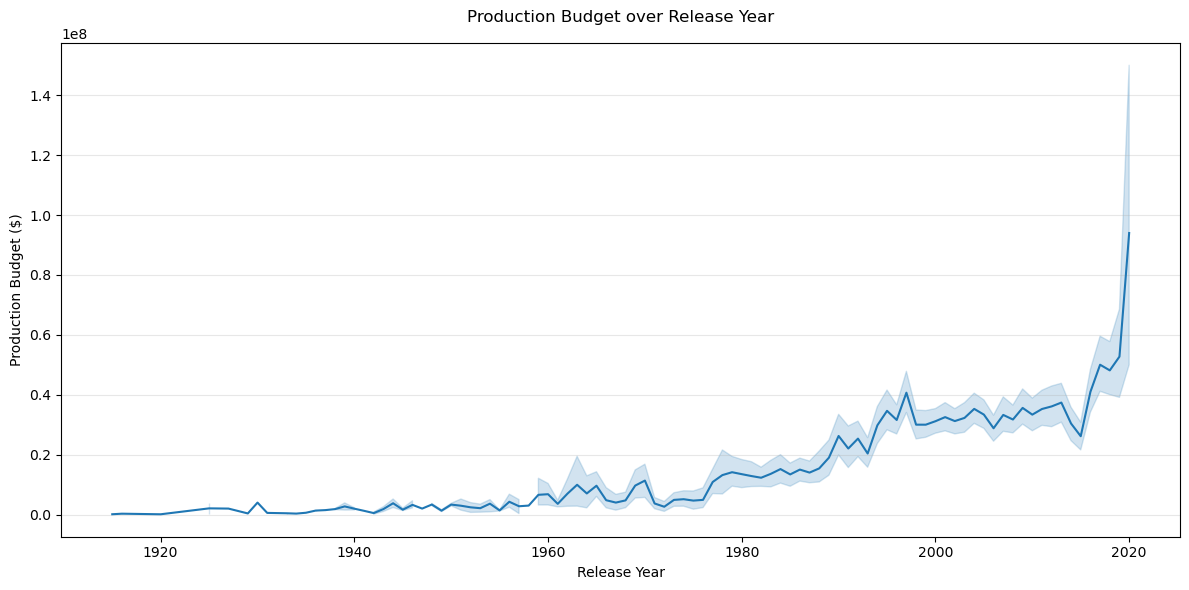

In [106]:
# convert infinite values to NAN
budget_df['production_budget'] = budget_df['production_budget'].replace([np.inf, -np.inf], np.nan)

# plot production budget vs release year
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_df, x='release_year', y='production_budget')

plt.title('Production Budget over Release Year', pad=15)
plt.xlabel('Release Year')
plt.ylabel('Production Budget ($)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### OBSERVATIONS
#### . The average production budget remains very low and relatively stable in the early years(1910s-1950s)
#### . Starting around 1960s, there's an upward trend that continues to the 1970s and 80s 
#### . There's an accelerated growth from 1990s peaking to 2020


In [107]:
# Filter out zero or missing values
df = budget_df.copy()
df = df[(df['production_budget'] > 0) & (df['worldwide_gross'] > 0)]

# Calculate ROI
df['ROI'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

# Basic stats
print("=== Budget vs Worldwide Gross ===")
print(df[['production_budget', 'worldwide_gross']].describe())

print("\n=== Budget vs ROI ===")
print(df[['production_budget', 'ROI']].describe())

# Correlations
print("\n=== Correlation Matrix ===")
print(df[['production_budget', 'worldwide_gross', 'ROI']].corr())


# Clip extreme ROI values for readability
df = df[df['ROI'].between(-1, 10)]

# Budget vs Worldwide Gross
fig1 = px.scatter(
    df,
    x='production_budget',
    y='worldwide_gross',
    title='Production Budget vs Worldwide Gross',
    labels={
        'production_budget': 'Production Budget (USD)',
        'worldwide_gross': 'Worldwide Gross (USD)'
    },
    trendline='ols',
    opacity=0.7,
    color_discrete_sequence=['#0E76A8']
)
fig1.update_layout(template='plotly_white')
fig1.show()

# Budget vs ROI
fig2 = px.scatter(
    df,
    x='production_budget',
    y='ROI',
    title='Production Budget vs ROI',
    labels={
        'production_budget': 'Production Budget (USD)',
        'ROI': 'Return on Investment'
    },
    trendline='ols',
    opacity=0.7,
    color_discrete_sequence=['#E4572E']
)
fig2.update_layout(template='plotly_white')
fig2.show()

=== Budget vs Worldwide Gross ===
       production_budget  worldwide_gross
count       5.415000e+03     5.415000e+03
mean        3.330801e+07     9.768800e+07
std         4.248758e+07     1.788591e+08
min         1.100000e+03     2.600000e+01
25%         6.000000e+06     7.004834e+06
50%         1.900000e+07     3.333987e+07
75%         4.200000e+07     1.044590e+08
max         4.250000e+08     2.776345e+09

=== Budget vs ROI ===
       production_budget          ROI
count       5.415000e+03  5415.000000
mean        3.330801e+07     4.125491
std         4.248758e+07    30.487420
min         1.100000e+03    -0.999974
25%         6.000000e+06    -0.298948
50%         1.900000e+07     0.884921
75%         4.200000e+07     2.968780
max         4.250000e+08  1799.000000

=== Correlation Matrix ===
                   production_budget  worldwide_gross       ROI
production_budget           1.000000         0.746013 -0.056391
worldwide_gross             0.746013         1.000000  0.041897
ROI

### MULTIVARIATE ANALYSIS

Finally, we explore interactions between three or more variables at once. Multivariate analysis allows us to uncover deeper patterns that don’t emerge in simpler pairings; such as how budget, genre, and release year together impact box office performance.

This section helps surface higher-dimensional dynamics that reflect the real-world complexity of the movie industry.

In [108]:
fig = px.scatter(
    df,
    x='production_budget',
    y='worldwide_gross',
    color='ROI', 
    size=df['ROI'].abs(), 
    color_continuous_scale='RdYlGn',
    hover_data=['production_budget', 'worldwide_gross', 'ROI'],
    title='Production Budget vs Worldwide Gross with ROI'
)

fig.update_layout(
    xaxis_title='Production Budget (USD)',
    yaxis_title='Worldwide Gross (USD)',
    template='plotly_white'
)

fig.show()

### Lights, Camera… Profit? 

Each bubble is a movie.  
- The **further right** you go, the more it cost to make.  
- The **higher up**, the more money it made around the world.  
- **Bubble color?** That’s ROI — return on investment.  
  - Green = "Cha-ching! We made bank!"  
  - Red = "Yikes… call the accountants."  
- **Size?** Bigger bubble = bigger return.

#### Now the Plot Thickens:

- **Low-Budget Legends:** Look to the left. Small-budget films with MASSIVE green bubbles. These are the underdogs — the indie flicks or surprise hits that blew the roof off. Think *Paranormal Activity* or *Get Out*.

- **Mid-Budget Magic:** That $10M–$100M range? A sweet spot. You’ll find lots of green and gold here — films that didn’t need Marvel money to become box office gold.

- **Blockbuster Roulette:** Go too far right and you enter the danger zone. Sure, some mega-budget films soared (those few giant bubbles way up top), but many… fizzled. Small red dots, big budgets — those are *painful flops*.

- **Big Gross ≠ Big Win:** Just because a film made a billion dollars doesn’t mean it was a great investment. If it cost $500M to make and market, the ROI could still be “meh.”

#### Final Take:

In Hollywood, bigger isn’t always better.  
Sometimes, the smartest move is to bet on story, not spectacle.  
Because as this chart shows, the **real blockbusters** aren’t always the ones with the biggest explosions — they’re the ones with the **biggest returns**.

In [109]:
# Inspect distributions
print("==========Distribution Summary===========")

print("Production Budget:")
print(budget_df['production_budget'].describe(), "\n")

print("Worldwide Gross:")
print(budget_df['worldwide_gross'].describe(), "\n")

==========Distribution Summary===========
Production Budget:
count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64 

Worldwide Gross:
count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64 



In [110]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'release_month', 'release_weekday',
       'release_quarter', 'season'],
      dtype='object')

In [111]:
# Calculate ROI
budget_df['roi'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) / budget_df['production_budget']

print("ROI:")
print(budget_df['roi'].describe(), "\n")

ROI:
count    5782.000000
mean        3.800161
std        29.530282
min        -1.000000
25%        -0.507704
50%         0.708310
75%         2.758346
max      1799.000000
Name: roi, dtype: float64 



In [112]:
# ROI bins for insight
print("ROI Value Counts:")
print(pd.cut(
    budget_df['roi'],
    bins=[-float('inf'), 0, 1, 5, 10, float('inf')],
    labels=["Loss (<0)", "Low ROI (0-1)", "Modest ROI (1-5)", "High ROI (5-10)", "Blockbuster (>10)"]
).value_counts().sort_index(), "\n")

ROI Value Counts:
roi
Loss (<0)            2125
Low ROI (0-1)        1038
Modest ROI (1-5)     1806
High ROI (5-10)       459
Blockbuster (>10)     354
Name: count, dtype: int64 



In [113]:
# Nulls check
print("Missing values:")
print(budget_df[['production_budget', 'worldwide_gross', 'roi']].isna().sum())

Missing values:
production_budget    0
worldwide_gross      0
roi                  0
dtype: int64


In [114]:
# Preview the data
print("Columns:", gross_df.columns)

# Basic stats
print("\nDescriptive Statistics:")
print(gross_df[['domestic_gross', 'foreign_gross']].describe())

# Null check
print("\nMissing Values:")
print(gross_df[['domestic_gross', 'foreign_gross']].isna().sum())


Columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Descriptive Statistics:
       domestic_gross  foreign_gross
count    3.387000e+03   3.387000e+03
mean     2.851978e+07   5.259091e+07
std      6.675093e+07   1.100108e+08
min      1.000000e+02   6.000000e+02
25%      1.225000e+05   1.175000e+07
50%      1.400000e+06   1.890000e+07
75%      2.750000e+07   2.915000e+07
max      9.367000e+08   9.605000e+08

Missing Values:
domestic_gross    0
foreign_gross     0
dtype: int64


In [115]:
# Remove any rows with missing or zero values
gross_df_clean = gross_df.dropna(subset=['domestic_gross', 'foreign_gross'])
gross_df_clean = gross_df_clean[(gross_df_clean['domestic_gross'] > 0) & (gross_df_clean['foreign_gross'] > 0)]

# Ensure 'year' is integer
gross_df_clean['year'] = gross_df_clean['year'].astype(int)

# Print distribution summaries
print("Domestic Gross Distribution:")
print(gross_df_clean['domestic_gross'].describe())

print("\nForeign Gross Distribution:")
print(gross_df_clean['foreign_gross'].describe())

print("\nYear Range:", gross_df_clean['year'].min(), "-", gross_df_clean['year'].max())


Domestic Gross Distribution:
count    3.387000e+03
mean     2.851978e+07
std      6.675093e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.750000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

Foreign Gross Distribution:
count    3.387000e+03
mean     5.259091e+07
std      1.100108e+08
min      6.000000e+02
25%      1.175000e+07
50%      1.890000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

Year Range: 2010 - 2018


### Compare Foreign Vs. Domestic Gross using BOM Movies Gross Data

In [116]:
fig = px.scatter(
    gross_df_clean,
    x='domestic_gross',
    y='foreign_gross',
    color='year',
    size='foreign_gross',
    hover_name='title',
    title='Foreign vs Domestic Gross Revenue (All Studios)',
    labels={
        'domestic_gross': 'Domestic Gross ($)',
        'foreign_gross': 'Foreign Gross ($)',
        'year': 'Release Year'
    },
    color_continuous_scale='Turbo'
)

fig.update_layout(template='plotly_white')
fig.show()


### Observation: 
Foreign Audiences Are Driving the Box Office

What this chart makes crystal clear is that the global box office has become the true heavyweight in movie revenue.

#### Key Takeaways:

- **Foreign Revenue Outpaces Domestic**  
  A large cluster of movies earned significantly more internationally than in the U.S. You can see it in the vertical spread - films with modest U.S. performance (low x-axis) that absolutely soared abroad (high y-axis). The international audience isn’t just supplementing revenue; in many cases, they’re *leading* it.

- **Success Isn't Tied to Year**  
  Bubbles from earlier years (cool tones, like blue and purple) are still holding their own. Films released as far back as 2010 are pulling numbers that rival those from 2018. A strong story and global appeal can outperform time.

- **Total Revenue Lives in the Midrange**  
  Most bubbles fall between the $100M–$600M range in both domestic and foreign gross. While a few massive outliers exist, the bulk of studio films thrive here — not necessarily billion-dollar hits, but commercially strong and globally viable.

- **Some Films Were International-Only Hits**  
  There’s a visible set of films that barely made a dent in the U.S., but went on to generate hundreds of millions abroad. That’s a major signal: different regions respond to different stories, and a domestic underperformance doesn’t mean failure.

#### Final Thought:

This chart isn’t just about numbers — it’s a shift in mindset.  
Theaters may be in the U.S., but the money is global. Studios that embrace international markets from the start aren’t just expanding reach - they’re **future-proofing** their success.

### Long Term Gross Trends

In [117]:
# Aggregate total domestic & foreign gross per year
gross_by_year = gross_df_clean.groupby('year')[['domestic_gross', 'foreign_gross']].sum().reset_index()

# Melt into long format for plotting
gross_long = gross_by_year.melt(id_vars='year', var_name='revenue_type', value_name='gross')

fig = px.line(
    gross_long,
    x='year',
    y='gross',
    color='revenue_type',
    title='Total Gross Revenue Over Time',
    labels={
        'gross': 'Total Gross ($)',
        'year': 'Year',
        'revenue_type': 'Revenue Type'
    },
    color_discrete_map={
        'domestic_gross': '#1f77b4',
        'foreign_gross': '#ff7f0e'
    }
)

fig.update_layout(template='plotly_white')
fig.show()


In [118]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,genre_split
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure|Fantasy|Family,[Adventure|Fantasy|Family]
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy|Adventure|Animation|Family,[Fantasy|Adventure|Animation|Family]
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Adventure|Action|Science Fiction,[Adventure|Action|Science Fiction]
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Animation|Comedy|Family,[Animation|Comedy|Family]
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Action|Science Fiction|Adventure,[Action|Science Fiction|Adventure]


In [119]:
tmdb_df = tmdb_df.dropna(subset=['popularity', 'vote_average', 'vote_count', 'release_date', 'genres'])

# Convert release_date to datetime and extract year
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')
tmdb_df = tmdb_df.dropna(subset=['release_date'])
tmdb_df['year'] = tmdb_df['release_date'].dt.year

# Split genres into individual rows
tmdb_df['genre_split'] = tmdb_df['genres'].str.split('|')
tmdb_exploded = tmdb_df.explode('genre_split')

# Optional cleanup
tmdb_exploded['genre_split'] = tmdb_exploded['genre_split'].str.strip().str.title()


In [120]:
genre_popularity = (
    tmdb_exploded
    .groupby(['year', 'genre_split'])['popularity']
    .mean()
    .reset_index()
)

fig = px.line(
    genre_popularity,
    x='year',
    y='popularity',
    color='genre_split',
    title='Average Genre Popularity Over Time',
    markers=True,
    template='plotly_white'
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Popularity',
    legend_title='Genre',
    #hovermode='x unified'
)
fig.show()

### A Century of Trends: How Genre Popularity Has Evolved Over Time

This multi-line plot capturing the **rhythms of cultural preference** and the evolution of audience taste.

#### The Early Days: 1930s–1960s
In the golden age of cinema, genres like **War** and **Romance** held steady ground. Popularity levels were modest yet consistent, mirroring a more centralized studio system and limited global distribution.

#### Genre Flux: 1970s–1990s
As cinema diversified, **genre dynamics grew erratic**:
- **Thriller**, **Horror**, and **Adventure** began gaining traction.
- Peaks and valleys in the data reflect the rise of **blockbuster filmmaking** and experimentation with new narratives.
- No single genre dominated across the decades—**trends were increasingly short-lived**, riding the wave of cultural or technological influence.

#### The Explosion Era: 2000s
The early 2000s marked a **dramatic spike in genre popularity**:
- **Fantasy** surged around the release of major franchises (e.g *Harry Potter*, *The Lord of the Rings*).
- **Animation** and **Science Fiction** saw noticeable peaks, coinciding with advances in CGI and a global appetite for imaginative storytelling.
- Interestingly, genres like **Comedy** and **Drama**, traditionally strong, showed a more **volatile and fragmented pattern**.

#### The Decline? 2010s–2020s
Despite high production volumes, average popularity across genres **flattened or dipped** in the last decade:
- This may reflect the **streaming era**, where niche content thrives but mass popularity is harder to achieve.
- **Genre loyalty is fading**—modern audiences mix and match, diluting clear popularity surges.

> **What does it all mean?**  
> Genre popularity is no longer predictable. While a few standout moments define each decade, the modern landscape is fragmented and dynamic—**every genre has a moment**, but none hold the throne for long.

In [121]:
filtered = tmdb_exploded[tmdb_exploded['vote_count'] > 50]

fig = px.scatter(
    filtered,
    x='popularity',
    y='vote_average',
    color='genre_split',
    size='vote_count',
    hover_name='title',
    title='Genre Popularity against Vote Average by Genre',
    template='plotly_white'
)
fig.show()

### What Makes a Genre Shine? Popularity vs. Quality

At first glance, we see a **dense cloud** of titles tightly packed between **popularity scores of 0–30** and **vote averages of 5–8**. This is the heartland of cinema—where most films live, breathe, and compete.

But what’s more telling are the outliers:
- A **Romance film** surges past **80 in popularity**, scoring high in votes, showing that the genre can occasionally captivate both the masses and critics.
- A **Thriller** trails closely behind, also claiming a spotlight spot with **exceptional popularity** and decent ratings.
- **Science Fiction** and **Drama** genres cluster around the 7.5+ vote average - these genres seem to resonate well with audiences on quality, even if they don’t always dominate popularity.

Meanwhile, genres like **Documentary**, **TV Movies**, and **War** appear more modest, with generally smaller bubbles and less extreme values - suggesting niche but loyal audiences.

> **In essence:**  
> The intersection of **art and attention** is genre-dependent. Some genres, like **Romance and Thriller**, occasionally explode in popularity, while others like **Drama and Sci-Fi** steadily earn audience respect. The best-performing films balance both—earning not just **views**, but **applause**.